# Analysis

    * Temperatures tend to be higher around the equator point and they drop the further you are from that point. This is due to the shape of the earth being round.
    * Latitude doesn't affect wind speed, because the speed of the wind is controlled by the strenght of the air pressure.
    * The climate in the southern hemisphere tends to be milder than the one in the northern hemisphere because the southern hemisphere has more ocean and less land than the northern hemisphere.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities list

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

# Perform API Calls

    . Perform a weather check on each city using a series of successive API calls.
    . Include a print log of each city as it's being processed (with the city number and city name)

In [39]:
#First, create a list to hold the variables below

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [107]:
# Save config information.
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_keys = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="

In [41]:

print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")


-----------------------------
Processing Record 1 of Set 1 : itarema
Processing Record 2 of Set 1 : macherla
Processing Record 3 of Set 1 : esperance
Processing Record 4 of Set 1 : ushuaia
Processing Record 5 of Set 1 : punta arenas
Processing Record 6 of Set 1 : peniche
Processing Record 7 of Set 1 : tuktoyaktuk
Processing Record 8 of Set 1 : nikolskoye
Processing Record 9 of Set 1 : bredasdorp
Processing Record 10 of Set 1 : yulara
Processing Record 11 of Set 1 : torbay
Processing Record 12 of Set 1 : thompson
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : yar-sale
Processing Record 15 of Set 1 : dikson
Processing Record 16 of Set 1 : kindu
Processing Record 17 of Set 1 : butaritari
Processing Record 18 of Set 1 : moundou
Processing Record 19 of Set 1 : hobart
Processing Record 20 of Set 1 : puerto ayora
Processing Record 21 of Set 1 : ranfurly
Processing Record 22 of Set 1 : biltine
Processing Record 23 of Set 1 : cape town
Processing Record 24 of Set 1 : pu

Processing Record 31 of Set 4 : kysyl-syr
Processing Record 32 of Set 4 : bonthe
Processing Record 33 of Set 4 : awjilah
Processing Record 34 of Set 4 : bandiagara
Processing Record 35 of Set 4 : tanabe
Processing Record 36 of Set 4 : talnakh
Processing Record 37 of Set 4 : nikitinskiy
Processing Record 38 of Set 4 : qaanaaq
Processing Record 39 of Set 4 : korla
Processing Record 40 of Set 4 : lander
Processing Record 41 of Set 4 : hilo
Processing Record 42 of Set 4 : san rafael
Processing Record 43 of Set 4 : bloomfield
City not found. Skipping...
Processing Record 44 of Set 4 : rudnichnyy
Processing Record 45 of Set 4 : necochea
Processing Record 46 of Set 4 : havoysund
Processing Record 47 of Set 4 : luderitz
Processing Record 48 of Set 4 : denizli
Processing Record 49 of Set 4 : znamenskoye
City not found. Skipping...
Processing Record 50 of Set 4 : lagoa
Processing Record 0 of Set 5 : petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 : port augusta
Processing Record 2 of Set 

City not found. Skipping...
Processing Record 13 of Set 8 : canita
Processing Record 14 of Set 8 : acapulco
Processing Record 15 of Set 8 : marsa matruh
Processing Record 16 of Set 8 : heidenreichstein
Processing Record 17 of Set 8 : ponta delgada
Processing Record 18 of Set 8 : lasa
Processing Record 19 of Set 8 : araouane
Processing Record 20 of Set 8 : cayenne
Processing Record 21 of Set 8 : qui nhon
Processing Record 22 of Set 8 : vao
Processing Record 23 of Set 8 : kattivakkam
Processing Record 24 of Set 8 : santa cruz cabralia
Processing Record 25 of Set 8 : tukrah
Processing Record 26 of Set 8 : alice springs
Processing Record 27 of Set 8 : mogadishu
City not found. Skipping...
Processing Record 28 of Set 8 : pascagoula
City not found. Skipping...
Processing Record 29 of Set 8 : san patricio
Processing Record 30 of Set 8 : barra
Processing Record 31 of Set 8 : vila velha
Processing Record 32 of Set 8 : rudnyy
City not found. Skipping...
Processing Record 33 of Set 8 : loikaw
Pro

# Convert Raw Data to DataFrame
    . Export the city data into a csv
    . Display the DataFrame

In [76]:
# Create a panda data frame using data retrieved
city_data = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Itarema,97,BR,1650735390,96,-2.9248,-39.9167,74.50,8.12
1,Mācherla,81,IN,1650736171,54,16.4833,79.4333,85.51,15.17
2,Esperance,70,AU,1650736006,88,-33.8667,121.9000,57.04,11.03
3,Ushuaia,75,AR,1650735835,66,-54.8000,-68.3000,46.06,9.22
4,Punta Arenas,100,CL,1650735636,87,-53.1500,-70.9167,46.42,9.22
...,...,...,...,...,...,...,...,...,...
530,Nicoya,30,CR,1650736005,44,10.1483,-85.4520,90.90,4.99
531,Uppsala County,75,SE,1650736356,57,60.0000,17.7500,45.84,17.27
532,Darnah,0,LY,1650736356,83,32.7670,22.6367,61.70,16.44
533,Aklavik,0,CA,1650736357,63,68.2191,-135.0107,23.00,9.22


In [77]:
#Save city data into a csv
city_data.to_csv("output_data/cities.csv", index = False)

# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

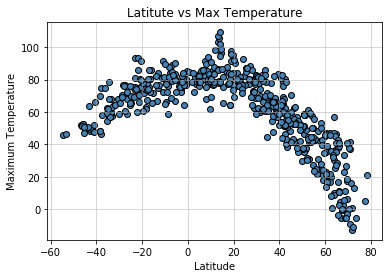

In [78]:
# Create a Scatter Plot for temperature vs latitude

plt.title("Latitute vs Max Temperature")
x_values = city_data["Lat"]
y_values = city_data["Max Temp"]
plt.scatter(x_values,y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/Latitude vs Max Temperature.png")
plt.show()

The highest temperature can be found at a latitude of around 18 or 19. Additionally as the latitude increases or decreases, the temperature decreases.

# Latitude vs. Humidity Plot

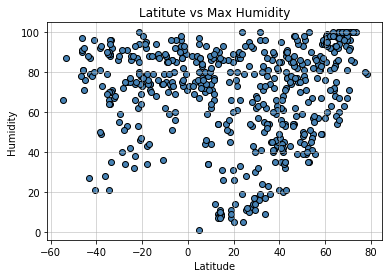

In [79]:
# Create a Scatter Plot for latitude vs humidity

plt.title("Latitute vs Max Humidity")
x_values = city_data["Lat"]
y_values = city_data["Humidity"]
plt.scatter(x_values,y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/Latitude vs Humidity.png")
plt.show()

On this graph we can see that as the latitude increases, the humidity increases as well.

# Latitude vs. Cloudiness Plot

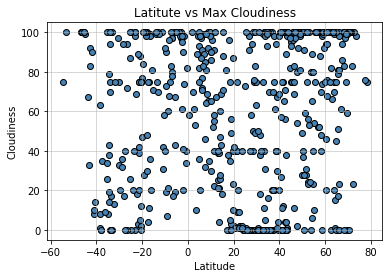

In [80]:
# Create a Scatter Plot for latitute vs cloudiness

plt.title("Latitute vs Max Cloudiness")
x_values = city_data["Lat"]
y_values = city_data["Cloudiness"]
plt.scatter(x_values,y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/Latitude vs Cloudiness.png")
plt.show()

In this case, the cloudiness is spread across the latitude.

# Latitude vs. Wind Speed Plot

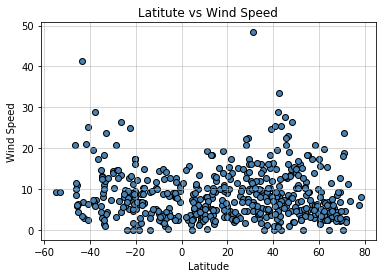

In [81]:
# Create a Scatter Plot for latitude vs wind speed

plt.title("Latitute vs Wind Speed")
x_values = city_data["Lat"]
y_values = city_data["Wind Speed"]
plt.scatter(x_values,y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("Images/Latitude vs Max Wind Speed.png")
plt.show()

On this graph, we can see that wind speed is spread across the latitude.

# Linear Regression

In [82]:
#Northern and Southern Hemispheres
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]

#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [83]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Get regression values
regress_values = northern_hemisphere["Lat"] * slope + intercept
print(regress_values)

1      82.542925
5      56.757899
6      22.826958
7      33.819175
10     47.388823
         ...    
530    89.684607
531    33.484919
532    64.185700
533    24.219220
534    31.053929
Name: Lat, Length: 375, dtype: float64


In [84]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.13x +101.13


The r-value is: -0.8729272999529846


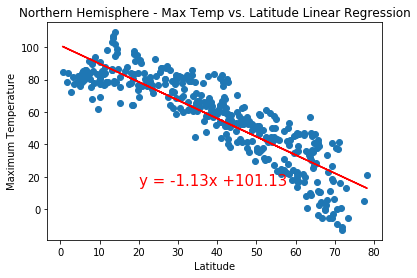

In [85]:
# Create Plot
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


There is a strong negative correlation between the latitude and the temperature in the northern hemisphere.

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [86]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Get regression values
regress_values = southern_hemisphere["Lat"] * slope + intercept
print(regress_values)

0      82.570502
2      62.683999
3      49.230070
4      50.290533
8      62.256279
         ...    
515    73.356303
516    71.885409
518    80.315573
521    71.148612
529    55.260761
Name: Lat, Length: 160, dtype: float64


In [87]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.64x +84.45


The r-value is: 0.7526323824347985


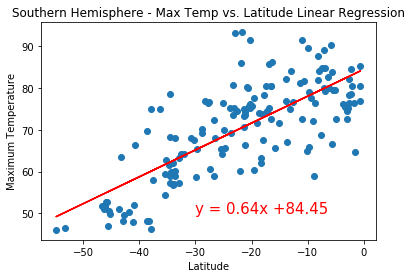

In [88]:
# Create Plot
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a strong positive correlation between the latitude and the maximum temperature.

#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [89]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Get regression values
regress_values = northern_hemisphere["Lat"] * slope + intercept
print(regress_values)

1      57.610243
5      67.167677
6      79.744462
7      75.670106
10     70.640403
         ...    
530    54.963118
531    75.794000
532    64.414501
533    79.228409
534    76.695067
Name: Lat, Length: 375, dtype: float64


In [90]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.42x +50.72


The r-value is: 0.32331618806732615


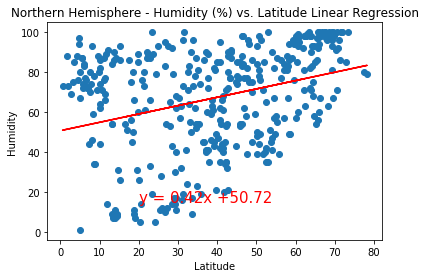

In [91]:
# Create Plot
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a weak positive correlation between Latitude and Humidity in the northern hemisphere.

#  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [92]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Get regression values
regress_values = southern_hemisphere["Lat"] * slope + intercept
print(regress_values)

0      78.339659
2      73.362314
3      69.994962
4      70.260382
8      73.255261
         ...    
515    76.033459
516    75.665313
518    77.775278
521    75.480902
529    71.504369
Name: Lat, Length: 160, dtype: float64


In [93]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.16x +78.81


The r-value is: 0.12315662365195049


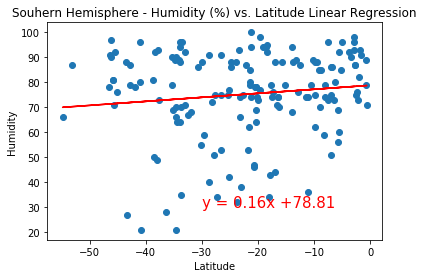

In [94]:
# Create Plot
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.title("Souhern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a very weak positive correlation between latitude and humidity in the southern hemisphere.

#  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [95]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Get regression values
regress_values = northern_hemisphere["Lat"] * slope + intercept
print(regress_values)

1      52.140619
5      59.043627
6      68.127410
7      65.184641
10     61.551858
         ...    
530    50.228691
531    65.274126
532    57.055102
533    67.754682
534    65.924936
Name: Lat, Length: 375, dtype: float64


In [96]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.3x +47.17


The r-value is: 0.16170648878432478


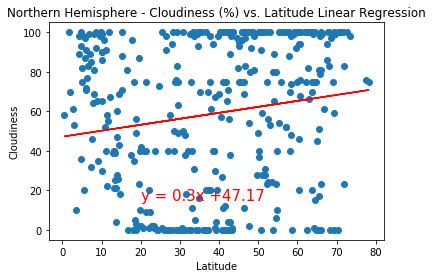

In [97]:
# Create Plot
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a very weak positive correlation between cloudiness and latitude in the northern hemisphere.

#  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [98]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Get regression values
regress_values = southern_hemisphere["Lat"] * slope + intercept
print(regress_values)

0      67.713965
2      56.730970
3      49.300581
4      49.886258
8      56.494747
         ...    
515    62.625111
516    61.812760
518    66.468604
521    61.405839
529    52.631234
Name: Lat, Length: 160, dtype: float64


In [99]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.35x +68.75


The r-value is: 0.13192694286220816


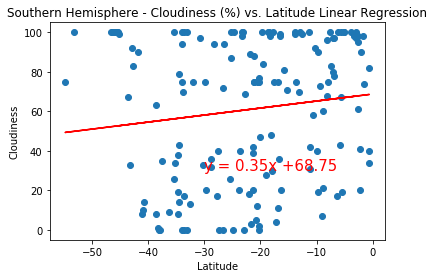

In [100]:
# Create Plot
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a weak positive correlation between latitude and cloudiness in the southern hemisphere.

#  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [101]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Get regression values
regress_values = northern_hemisphere["Lat"] * slope + intercept
print(regress_values)

1      8.409492
5      8.213670
6      7.955985
7      8.039465
10     8.142518
         ...   
530    8.463728
531    8.036926
532    8.270080
533    7.966559
534    8.018464
Name: Lat, Length: 375, dtype: float64


In [102]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.01x +8.55


The r-value is: -0.028205874721193267


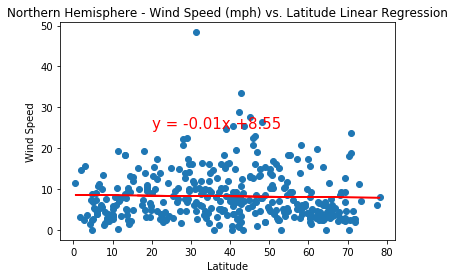

In [103]:
# Create Plot
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a very weak negative correlation between latitude and wind speed in the northern hemisphere.

#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [104]:
# Perform a linear regression on Northern hemisphere temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Get regression values
regress_values = southern_hemisphere["Lat"] * slope + intercept
print(regress_values)

0       6.183998
2      10.125000
3      12.791229
4      12.581072
8      10.209763
         ...    
515     8.010019
516     8.301513
518     6.630868
521     8.447528
529    11.596098
Name: Lat, Length: 160, dtype: float64


In [105]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.13x +5.81


The r-value is: -0.275432744291914


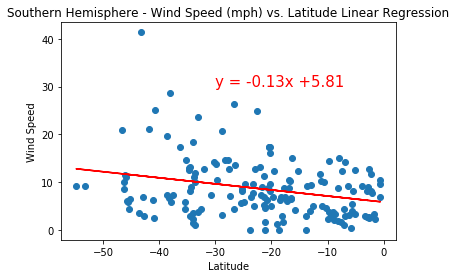

In [106]:
# Create Plot
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

There is a very weak negative correlation between latitude and wind speed in the southern hemisphere.